# Data Science Salaries

## Load data

In [75]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Kireei/Dataset_Salaries/refs/heads/main/DataScience_salaries_2024.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(color_codes=True)
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L
14837,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,DE,S


### Melakukan Pengecekan Data Type

In [77]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [78]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [79]:
df.shape

(14838, 11)

### Menghapus Duplicate Data

In [80]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (5711, 11)


In [81]:
df.count()      # Used to count the number of rows

work_year             14838
experience_level      14838
employment_type       14838
job_title             14838
salary                14838
salary_currency       14838
salary_in_usd         14838
employee_residence    14838
remote_ratio          14838
company_location      14838
company_size          14838
dtype: int64

In [82]:
df = df.drop_duplicates()
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [83]:
df.count()

work_year             9127
experience_level      9127
employment_type       9127
job_title             9127
salary                9127
salary_currency       9127
salary_in_usd         9127
employee_residence    9127
remote_ratio          9127
company_location      9127
company_size          9127
dtype: int64

In [84]:
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


### Menghapus Tabel Data

menghapus tabel data salary dan salary_currency yang menurut saya tidak diperlukan.

In [85]:
df = df.drop(['salary', 'salary_currency'], axis=1)
df.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,95386,IN,50,IN,L


## Data pre-processing

### Mengurutkan data

In [86]:
experience_order = ['EN', 'MI', 'SE', 'EX']
experience_mapping = {level: i for i, level in enumerate(experience_order)}

df['experience_level_order'] = df['experience_level'].map(experience_mapping)

df_sorted = df.sort_values(by=['work_year', 'experience_level_order'], ascending=[True, True])

df_sorted = df_sorted.drop(columns=['experience_level_order'])
df = df_sorted
df.head(20)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
14,2020,EN,FT,Data Engineer,41689,JP,100,JP,S
471,2020,EN,FT,AI Scientist,45896,DK,50,DK,S
1188,2020,EN,FT,Machine Learning Engineer,250000,US,50,US,L
7975,2020,EN,FT,Machine Learning Engineer,138000,US,100,US,S
11003,2020,EN,FT,Data Scientist,105000,US,100,US,S
11334,2020,EN,FT,Azure Data Engineer,100000,MU,0,MU,S
11491,2020,EN,CT,Business Data Analyst,100000,US,100,US,L
11989,2020,EN,FT,Data Analyst,91000,US,100,US,L
13293,2020,EN,FT,Data Analyst,72000,US,100,US,L
13484,2020,EN,FT,Big Data Engineer,70000,US,100,US,L


In [87]:
df['experience_level'] = df['experience_level'].str.replace(r'EN', 'Entry', regex=True)
df['experience_level'] = df['experience_level'].str.replace(r'MI', 'Mid', regex=True)
df['experience_level'] = df['experience_level'].str.replace(r'SE', 'Senior', regex=True)
df['experience_level'] = df['experience_level'].str.replace(r'EX', 'Expert', regex=True)

df.head(20)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
14,2020,Entry,FT,Data Engineer,41689,JP,100,JP,S
471,2020,Entry,FT,AI Scientist,45896,DK,50,DK,S
1188,2020,Entry,FT,Machine Learning Engineer,250000,US,50,US,L
7975,2020,Entry,FT,Machine Learning Engineer,138000,US,100,US,S
11003,2020,Entry,FT,Data Scientist,105000,US,100,US,S
11334,2020,Entry,FT,Azure Data Engineer,100000,MU,0,MU,S
11491,2020,Entry,CT,Business Data Analyst,100000,US,100,US,L
11989,2020,Entry,FT,Data Analyst,91000,US,100,US,L
13293,2020,Entry,FT,Data Analyst,72000,US,100,US,L
13484,2020,Entry,FT,Big Data Engineer,70000,US,100,US,L


In [98]:
df['work_year'] = df['work_year'].astype('int64')
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [89]:
df.to_csv('DataScience_salaries_2024.csv', index=False)

## Plots

### Box Plot

<Axes: xlabel='salary_in_usd'>

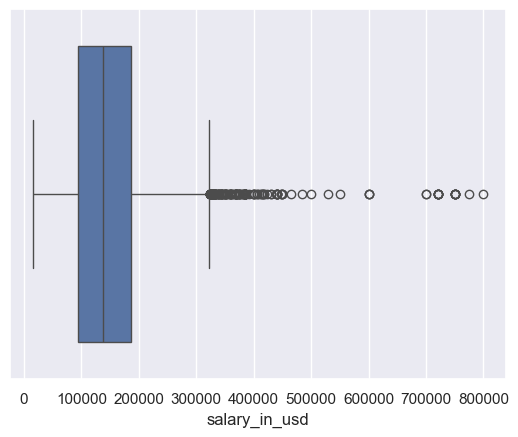

In [90]:
sns.boxplot(x=df['salary_in_usd'])

<Axes: xlabel='experience_level'>

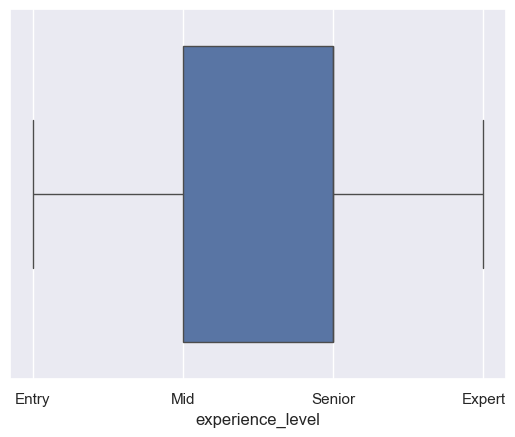

In [91]:
sns.boxplot(x=df['experience_level'])

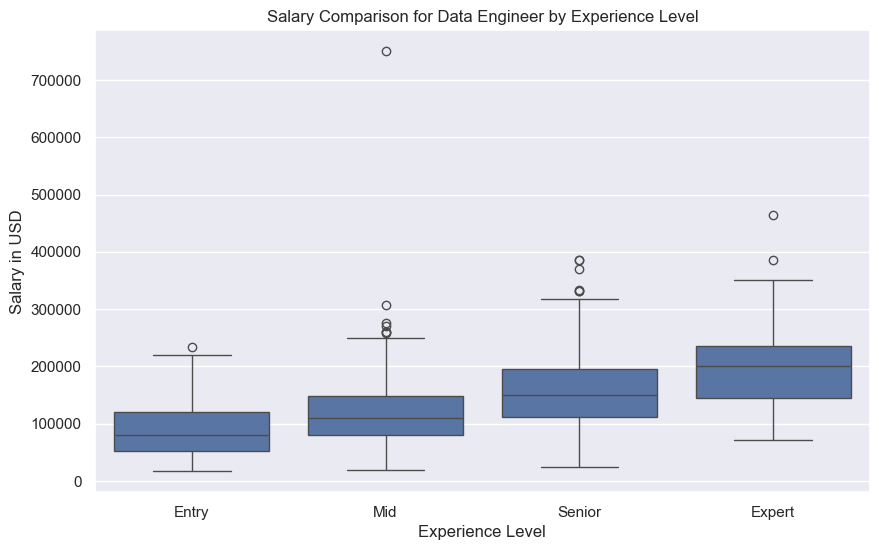

In [92]:
data_engineer_data = df[df['job_title'] == 'Data Engineer']

fig, ax = plt.subplots(figsize=(10, 6))

# ax.bar(data_engineer_data['experience_level'], data_engineer_data['salary_in_usd'])
sns.boxplot(x='experience_level', y='salary_in_usd', data=data_engineer_data, ax=ax)

ax.set_xlabel('Experience Level')
ax.set_ylabel('Salary in USD')
ax.set_title('Salary Comparison for Data Engineer by Experience Level')

plt.show()

### Bar Plot

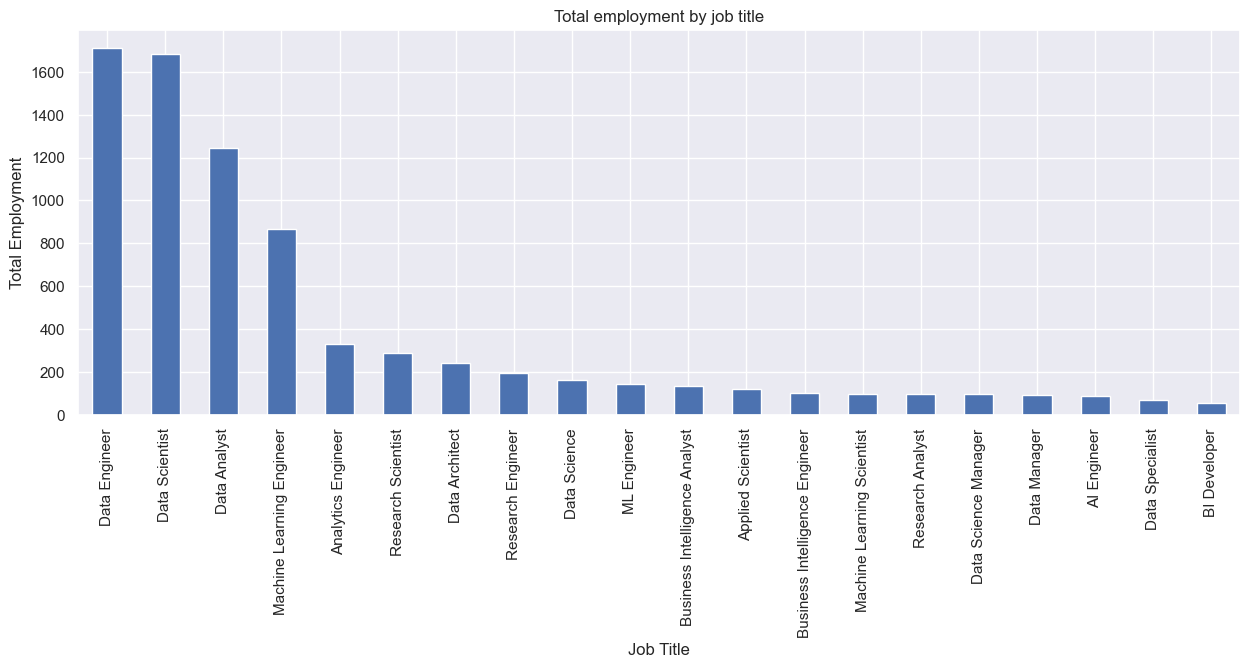

In [93]:
df.job_title.value_counts().nlargest(20).plot(kind='bar', figsize=(15,5))
plt.title("Total employment by job title")
plt.ylabel('Total Employment')
plt.xlabel('Job Title');

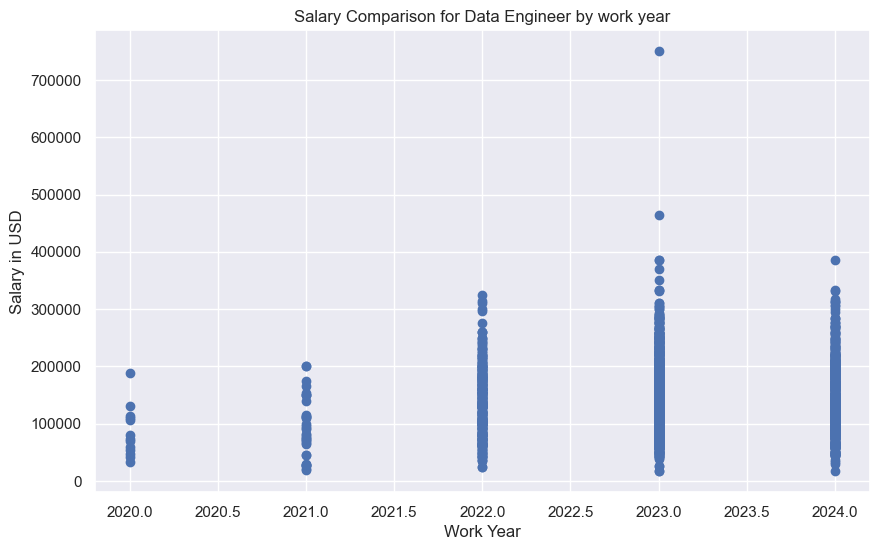

In [94]:
Data_Engineer_data = df[df['job_title'] == 'Data Engineer']

fig, ax = plt.subplots(figsize=(10, 6))

df['work_year'] = df['work_year'].astype(str)

ax.scatter(x='work_year', y='salary_in_usd', data=Data_Engineer_data)

ax.set_xlabel('Work Year')
ax.set_ylabel('Salary in USD')
ax.set_title('Salary Comparison for Data Engineer by work year')

plt.show()

### Pie Plot

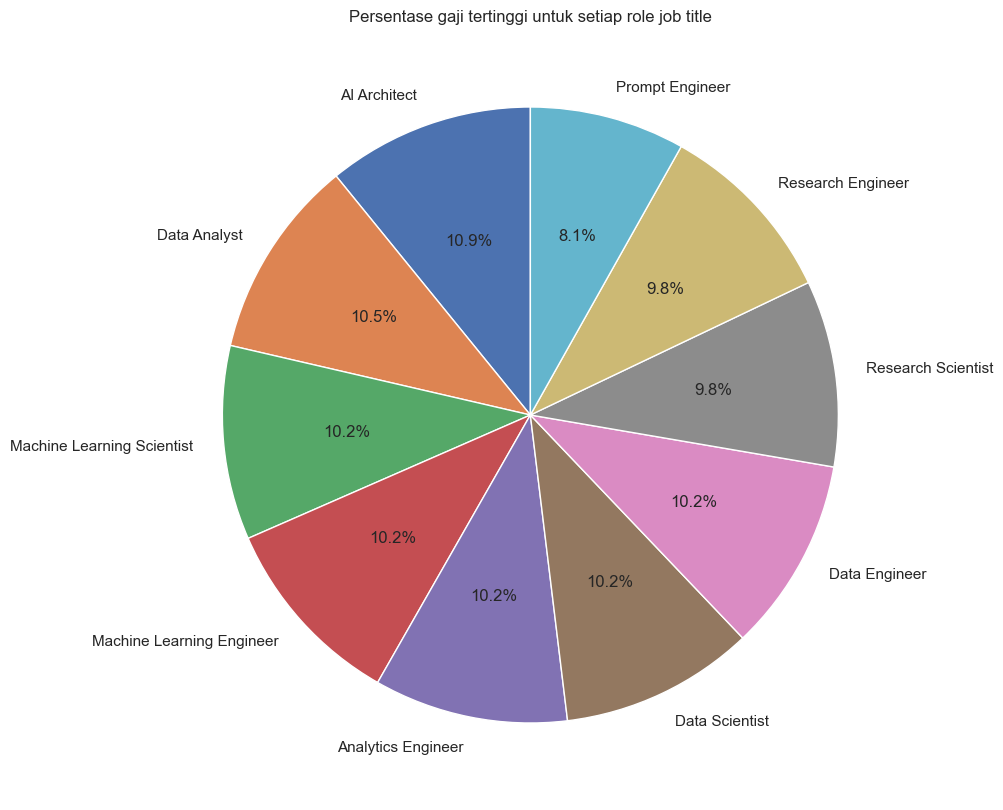

In [95]:
df_sorted = df.sort_values('salary_in_usd', ascending=False)

highest_salary = df_sorted.drop_duplicates(subset=['job_title'], keep='first')
top_salary = highest_salary.head(10)

plt.figure(figsize=(10, 10))

plt.pie(top_salary['salary_in_usd'], labels=top_salary['job_title'], autopct='%1.1f%%', startangle=90)

plt.title('Persentase gaji tertinggi untuk setiap role job title')
plt.show()

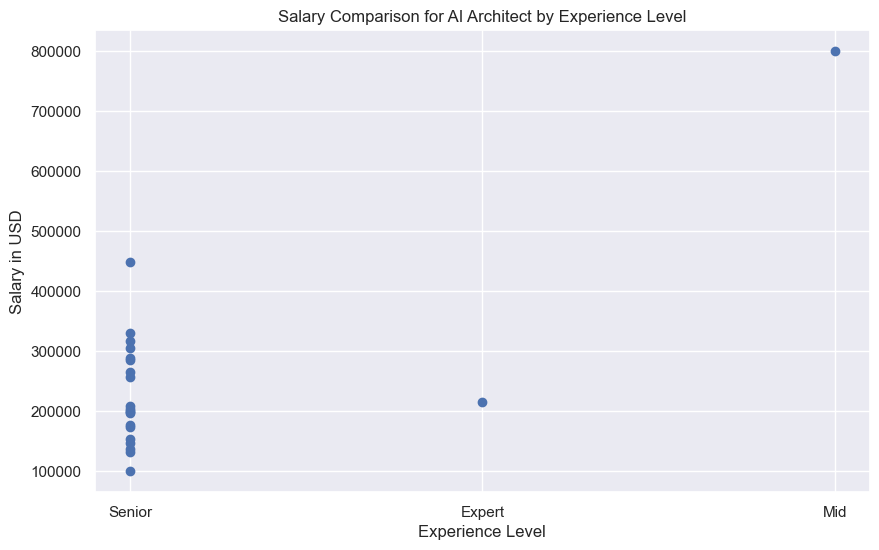

In [96]:
AI_Architect_data = df[df['job_title'] == 'AI Architect']

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x='experience_level', y='salary_in_usd', data=AI_Architect_data)

ax.set_xlabel('Experience Level')
ax.set_ylabel('Salary in USD')
ax.set_title('Salary Comparison for AI Architect by Experience Level')

plt.show()

### Line Chart

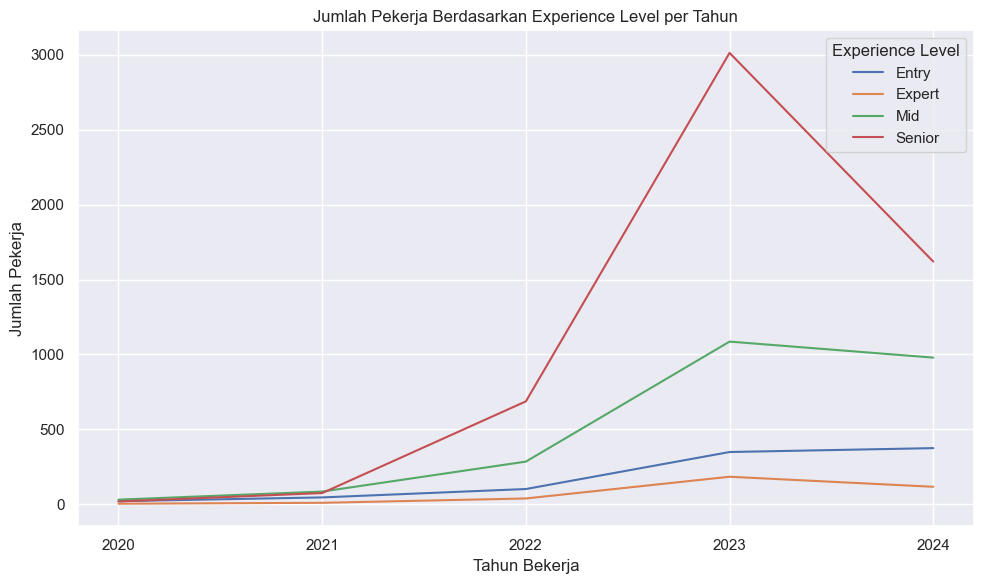

In [97]:

df_grouped = df.groupby(['work_year', 'experience_level']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
for level in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[level], label=level)

plt.title('Jumlah Pekerja Berdasarkan Experience Level per Tahun')
plt.xlabel('Tahun Bekerja')
plt.ylabel('Jumlah Pekerja')
plt.xticks(df_grouped.index)  
plt.legend(title='Experience Level')
plt.grid(True) 
plt.tight_layout()
plt.show()